## Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

## Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

In [4]:
import numpy as np
import scipy.stats as stats

def estimate_population_mean(sample, confidence_level=0.95):

    # Calculate the sample mean and sample standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    
    # Calculate the standard error of the mean
    standard_error = sample_std / np.sqrt(n)
    
    # Calculate the margin of error using the t-distribution for the given confidence level
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_critical * standard_error
    
    # Calculate the confidence interval
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    return sample_mean, ci_lower, ci_upper

# Example usage
sample = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
mean, ci_lower, ci_upper = estimate_population_mean(sample)
print(f"Estimated Population Mean: {mean}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")


Estimated Population Mean: 12.9
95% Confidence Interval: (6.444589262822148, 19.355410737177852)


## Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

## Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

## Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [12]:


def two_sample_z_test(sample1, sample2, var1, var2, alpha=0.05):


    # Calculate sample statistics
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Calculate the pooled standard error
    pooled_se = np.sqrt(var1/n1 + var2/n2)
    
    # Calculate the z-statistic
    z_statistic = (mean1 - mean2) / pooled_se
    
    # Calculate the p-value for a two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))
    
    # Determine whether to reject the null hypothesis
    if p_value < alpha:
        result = "Reject the null hypothesis. There is a significant difference between the two population means."
    else:
        result = "Fail to reject the null hypothesis. There is no significant difference between the two population means."
    
    return z_statistic, p_value, result

# Example usage
sample1 = [70, 75, 80, 85, 90, 95, 100]  # Sample data from population 1
sample2 = [55, 60, 65, 70, 75, 80, 85]   # Sample data from population 2
var1 = 100  # Population variance of population 1
var2 = 100  # Population variance of population 2

z_statistic, p_value, result = two_sample_z_test(sample1, sample2, var1, var2)
print(f"z-statistic: {z_statistic}")
print(f"p-value: {p_value}")
print(result)


z-statistic: 2.806243040080456
p-value: 0.005012287145488736
Reject the null hypothesis. There is a significant difference between the two population means.


## Q6: What is a null and alternative hypothesis? Give some examples.

## Q7: Write down the steps involved in hypothesis testing.

## Q8. Define p-value and explain its significance in hypothesis testing.

## Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

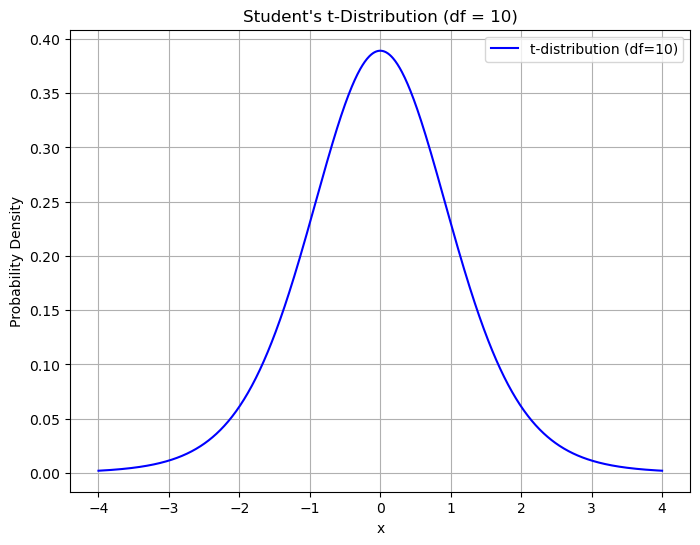

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Degrees of freedom
df = 10

# Generate x values
x = np.linspace(-4, 4, 1000)

# Generate y values for the t-distribution
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"t-distribution (df={df})", color='blue')
plt.title("Student's t-Distribution (df = 10)")
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
random samples of equal size and a null hypothesis that the population means are equal.

In [29]:


def two_sample_t_test(sample1, sample2, alpha=0.05):
   
    # Calculate sample statistics
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Calculate the pooled standard error
    pooled_se = np.sqrt(var1/n1 + var2/n2)
    
    # Calculate the t-statistic
    t_statistic = (mean1 - mean2) / pooled_se
    
    # Degrees of freedom for the two-sample t-test
    df_numerator = (var1/n1 + var2/n2) ** 2
    df_denominator = ((var1/n1) ** 2 / (n1 - 1)) + ((var2/n2) ** 2 / (n2 - 1))
    df = df_numerator / df_denominator
    
    # Calculate the p-value for a two-tailed test
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))
    
    # Determine whether to reject the null hypothesis
    if p_value < alpha:
        result = "Reject the null hypothesis. There is a significant difference between the two population means."
    else:
        result = "Fail to reject the null hypothesis. There is no significant difference between the two population means."
    
    return t_statistic, p_value, result

# Example usage
# Generating two random samples of equal size
np.random.seed(0)  # For reproducibility
sample1 = np.random.normal(loc=20, scale=4, size=30)  # Sample data from population 1
sample2 = np.random.normal(loc=25, scale=5, size=30)  # Sample data from population 2

t_statistic, p_value, result = two_sample_t_test(sample1, sample2)
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
print(result)


t-statistic: -1.53723193729314
p-value: 0.12968221611030817
Fail to reject the null hypothesis. There is no significant difference between the two population means.


## Q11: What is Student’s t distribution? When to use the t-Distribution.

## Q12: What is t-statistic? State the formula for t-statistic.

## Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
## clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
## standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

## Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
## standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

## Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 =30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean
## score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

## Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
## program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
## deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [ ]:
n=50 x=4 pop_mean= ? std =1.5 alpha=1-99=0.1

 For a 99% confidence level, the critical value is approximately 2.576.

positive=x+z*(std/sqart(n)) ==4.546

neg= x-z*(std/sqart(n))=3.454